In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np


Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 2s - loss: 0.5311 - accuracy: 0.4487 - val_loss: 0.4603 - val_accuracy: 0.4813
Epoch 2/10
 - 2s - loss: 0.4274 - accuracy: 0.4877 - val_loss: 0.4066 - val_accuracy: 0.4885
Epoch 3/10
 - 2s - loss: 0.3953 - accuracy: 0.4916 - val_loss: 0.3876 - val_accuracy: 0.4908
Epoch 4/10
 - 2s - loss: 0.3784 - accuracy: 0.4940 - val_loss: 0.3727 - val_accuracy: 0.4933
Epoch 5/10
 - 2s - loss: 0.3644 - accuracy: 0.4965 - val_loss: 0.3599 - val_accuracy: 0.4953
Epoch 6/10
 - 2s - loss: 0.3528 - accuracy: 0.4988 - val_loss: 0.3497 - val_accuracy: 0.4977
Epoch 7/10
 - 2s - loss: 0.3439 - accuracy: 0.5005 - val_loss: 0.3420 - val_accuracy: 0.4993
Epoch 8/10
 - 2s - loss: 0.3371 - accuracy: 0.5017 - val_loss: 0.3360 - val_accuracy: 0.5002
Epoch 9/10
 - 2s - loss: 0.3316 - accuracy: 0.5026 - val_loss: 0.3311 - val_accuracy: 0.5008
Epoch 10/10
 - 2s - loss: 0.3272 - accuracy: 0.5033 - val_loss: 0.3272 - val_accuracy: 0.5016


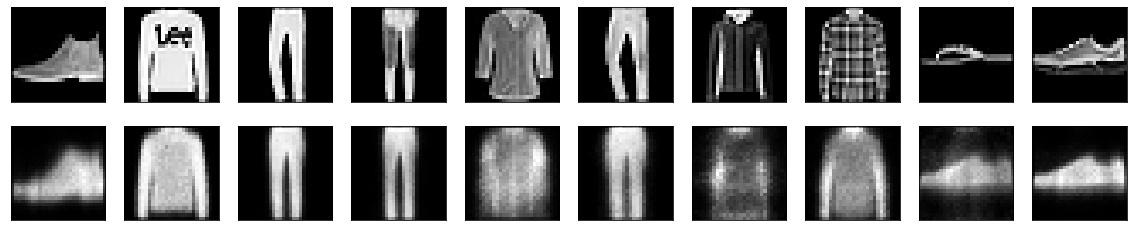

In [12]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
encoding_dim = 32 
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)

decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))



autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencode=autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                verbose=2,
                validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)



import matplotlib.pyplot as plt

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
encoding_dim = 32  
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [14]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,epochs=5,batch_size=256,shuffle=True,validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.5348 - val_loss: 0.4660
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.4291 - val_loss: 0.4086
Epoch 3/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.3985 - val_loss: 0.3912
Epoch 4/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.3813 - val_loss: 0.3745
Epoch 5/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.3657 - val_loss: 0.3608


In [0]:
encoding_dim = 32
hidden_size = 128
input_img = Input(shape=(784,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_2)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencode=autoencoder.fit(x_train, x_train,epochs=5, batch_size=256, verbose=2, shuffle=True, validation_data=(x_test, x_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 3s - loss: 0.5033 - accuracy: 0.4546 - val_loss: 0.4052 - val_accuracy: 0.4894
Epoch 2/5
 - 3s - loss: 0.3837 - accuracy: 0.4919 - val_loss: 0.3746 - val_accuracy: 0.4948
Epoch 3/5
 - 3s - loss: 0.3649 - accuracy: 0.4953 - val_loss: 0.3602 - val_accuracy: 0.4904
Epoch 4/5
 - 3s - loss: 0.3497 - accuracy: 0.4983 - val_loss: 0.3445 - val_accuracy: 0.5008
Epoch 5/5
 - 3s - loss: 0.3383 - accuracy: 0.5007 - val_loss: 0.3344 - val_accuracy: 0.4978


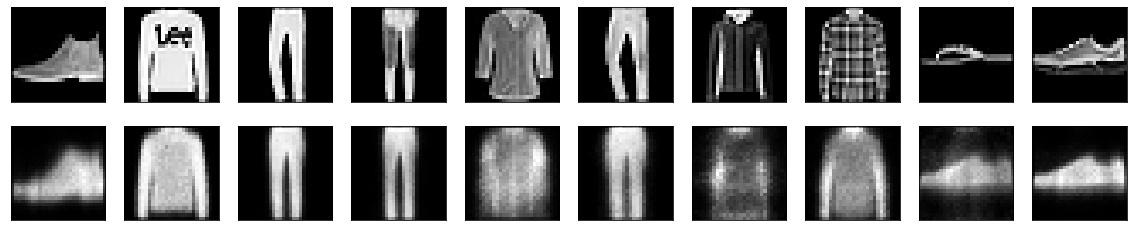

In [17]:
import matplotlib.pyplot as plt
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,epochs=10,batch_size=256,shuffle=True,validation_data=(x_test_noisy, x_test_noisy))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.5359 - val_loss: 0.4655
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.4319 - val_loss: 0.4064
Epoch 3/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.4009 - val_loss: 0.3881
Epoch 4/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3856 - val_loss: 0.3721
Epoch 5/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3716 - val_loss: 0.3577
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3602 - val_loss: 0.3463
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3515 - val_loss: 0.3376
Epoch 8/10
60000/60000 [==============================] - 2s 42us/step - loss: 0.3449 - val_loss: 0.3306
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.3396 - val_loss: 0.3249
Epoch

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 3s - loss: 0.5349 - accuracy: 0.4435 - val_loss: 0.4650 - val_accuracy: 1.2755e-07
Epoch 2/5
 - 2s - loss: 0.4301 - accuracy: 0.4874 - val_loss: 0.4087 - val_accuracy: 1.2755e-07
Epoch 3/5
 - 2s - loss: 0.3997 - accuracy: 0.4907 - val_loss: 0.3921 - val_accuracy: 1.2755e-07
Epoch 4/5
 - 2s - loss: 0.3847 - accuracy: 0.4934 - val_loss: 0.3776 - val_accuracy: 1.2755e-07
Epoch 5/5
 - 2s - loss: 0.3714 - accuracy: 0.4957 - val_loss: 0.3652 - val_accuracy: 1.2755e-07


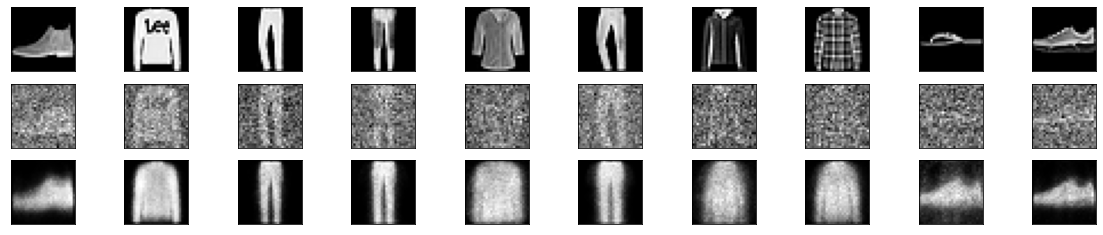

In [0]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32  

input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

autoencoder.fit(x_train_noisy, x_train,epochs=5,batch_size=256,shuffle=True,verbose=2,
                validation_data=(x_test, x_test_noisy))

encoded_imgs = encoder.predict(x_test_noisy)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display noisy
    ax = plt.subplot(3, n, i + 1+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i+1+n+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
 - 3s - loss: 0.5009 - accuracy: 0.4544 - val_loss: 0.4049 - val_accuracy: 0.4889
Epoch 2/5
 - 3s - loss: 0.3838 - accuracy: 0.4914 - val_loss: 0.3750 - val_accuracy: 0.4956
Epoch 3/5
 - 3s - loss: 0.3641 - accuracy: 0.4953 - val_loss: 0.3610 - val_accuracy: 0.4899
Epoch 4/5
 - 3s - loss: 0.3488 - accuracy: 0.4984 - val_loss: 0.3429 - val_accuracy: 0.5006
Epoch 5/5
 - 3s - loss: 0.3368 - accuracy: 0.5007 - val_loss: 0.3330 - val_accuracy: 0.4979


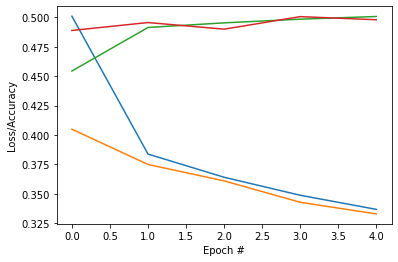

In [18]:
from keras.layers import Input, Dense
from keras.models import Model

import matplotlib.pyplot as plt
encoding_dim = 32  
hidden_size = 128
input_img = Input(shape=(784,))
hidden_1 = Dense(hidden_size, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(hidden_2)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencode=autoencoder.fit(x_train, x_train,epochs=5,batch_size=256,verbose=2,shuffle=True,validation_data=(x_test, x_test))

N=5
plt.figure()
plt.plot(np.arange(0, N), autoencode.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), autoencode.history["val_loss"], label="test_loss")
plt.plot(np.arange(0, N), autoencode.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), autoencode.history["val_accuracy"], label="test_acc")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.show()